In [1]:
# By: majda Wazzan , 12/2/2022
# 3 classes spread, CC, Leg   
###########################
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import os
import numpy as np
import pandas as pd           # ... eliminatio
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

###  the class code:
class 0 = df_mirai_leg
class 1 = df_bashlite_leg
class 2 = df_torii_leg
class 3 = df_mirai_CC
class 4 = df_mirai_spread 
class 5 = df_bashlite_CC 
class 6 = df_bashlite_spread 
class 7 = df_torii_mal 

### Read my labeled dataset MedBIoT

### The filename of the dataset (df_MedBIoT_all) in new CSV (df_MedBIoT_all.csv)

In [2]:

df_MedBIoT_all= pd.read_csv('df_MedBIoT_all_3Classes.csv', header=0)  #from model 10


In [3]:
df_MedBIoT_all   # 

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,Class
0,8.119090,85.262577,2.154520e+02,12.715432,85.430106,2.410619e+02,22.098051,84.712734,2.581714e+02,84.938541,...,0.000000e+00,0.000000e+00,40.981053,81.511474,3.444528e+01,5.869011e+00,81.511474,0.000000e+00,0.000000e+00,0
1,11.929964,516.358444,7.704967e+02,14.033933,516.208241,7.824682e+02,17.496759,516.010545,7.965394e+02,20.063248,...,0.000000e+00,0.000000e+00,62.517881,515.349777,8.389090e+02,2.896393e+01,515.349777,0.000000e+00,0.000000e+00,0
2,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.076384,...,1.270458e+00,1.293847e+00,4.871709,67.205295,9.589746e-01,2.525067e+00,95.077122,-9.089941e-02,-3.988214e-02,0
3,6.132969,60.074786,5.926919e-01,10.054135,60.147825,1.160747e+00,25.528954,60.672014,4.926224e+00,128.740564,...,7.070510e-29,6.347533e-17,409.786387,60.000000,9.094947e-12,3.438522e-06,84.852814,-3.328025e-27,-6.680758e-16,0
4,14.313002,69.235529,2.355523e+02,18.612767,68.970597,2.116271e+02,26.481134,68.730793,1.878978e+02,46.471145,...,-4.330960e+01,-1.086798e-02,2.999976,82.333416,5.028919e+02,1.889834e+02,150.230012,-9.898591e+00,-2.352295e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735625,32.502416,74.000000,2.728484e-12,57.691612,74.000000,1.818989e-12,253.108663,74.000000,4.547474e-12,2864.918570,...,0.000000e+00,0.000000e+00,5.249988,74.000000,0.000000e+00,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,2
735626,160.809030,74.000000,2.728484e-12,160.885381,74.000000,3.637979e-12,160.961781,74.000000,4.547474e-12,160.996178,...,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,2
735627,28.057297,74.000000,1.818989e-12,57.409867,74.000000,4.547474e-12,207.071892,74.000000,9.094947e-13,2198.439174,...,0.000000e+00,0.000000e+00,1.992991,74.000000,0.000000e+00,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,2
735628,82.028495,74.000000,6.366463e-12,159.612163,74.000000,1.364242e-11,423.706637,74.000000,1.000444e-11,3808.321767,...,0.000000e+00,0.000000e+00,2.909664,74.000000,9.094947e-13,9.536743e-07,74.000000,0.000000e+00,0.000000e+00,2


In [4]:
df_MedBIoT_all.shape


(735630, 101)

In [5]:
X=df_MedBIoT_all

In [6]:
# shuffle rows of dataframe 
sampler=np.random.permutation(len(X))
data=X.take(sampler)
data

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,Class
454247,13.601108,204.941127,2.149717e+04,18.354885,204.262801,2.141188e+04,28.027816,205.910945,2.338873e+04,113.865477,...,-1.630853e+03,-3.949833e-02,1554.901343,356.179204,1.904639e+05,5.532675e+02,459.868121,-1.302906e+04,-8.779120e-02,2
443195,87.676143,1351.664128,1.433486e+05,100.497160,1349.684505,1.450781e+05,116.699793,1342.662549,1.508194e+05,165.229509,...,1.504739e-01,8.351526e-03,698.369070,1285.896825,1.972270e+05,4.441271e+02,1287.314175,-1.795437e+02,-8.638048e-02,2
381325,1.000000,67.000000,0.000000e+00,1.000000,67.000000,5.184120e-11,1.000050,67.002200,1.060255e-01,6.452622,...,1.436372e-14,2.217931e-10,159.836964,123.247903,4.751512e+03,6.893123e+01,139.807271,-2.923065e-03,-8.506242e-04,1
655267,138.907330,74.000000,0.000000e+00,206.735131,74.000000,0.000000e+00,495.305974,74.000000,9.094947e-13,3012.618794,...,0.000000e+00,0.000000e+00,2.964337,74.000000,9.094947e-13,9.536743e-07,74.000000,0.000000e+00,0.000000e+00,2
203917,5.538782,60.000007,5.705245e-05,8.199153,60.001315,1.052141e-02,21.200116,60.270425,2.091595e+00,110.728758,...,-1.595060e-29,0.000000e+00,427.462280,60.000000,5.456968e-12,2.939422e-06,84.852814,-1.782391e-27,-4.276547e-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262260,22.940801,74.000000,3.365130e-11,38.194345,74.000000,7.251056e-07,114.313886,73.999358,8.994506e-03,1141.637500,...,7.766863e-30,1.302301e-18,1.409164,74.000000,1.091394e-11,8.064048e-06,95.268043,-2.756583e-26,-1.134284e-15,0
254130,23.208687,60.000000,1.357739e-08,38.427186,60.000003,1.125400e-04,115.153917,60.018541,5.613299e-01,1178.613113,...,9.126259e-28,0.000000e+00,11413.200451,60.000000,4.138201e-11,7.835234e-06,95.268043,5.430645e-27,1.887271e-16,0
18450,2.275305,60.215321,1.677500e+00,3.363251,60.527443,4.214859e+00,9.274058,62.633890,4.774255e+01,95.625106,...,3.691277e-31,3.630124e-19,382.699652,60.000000,4.092726e-12,3.090258e-06,84.852814,-2.905289e-27,-6.147623e-16,0
701304,176.250383,74.000000,9.094947e-12,264.568212,74.000000,8.185452e-12,701.906088,74.000000,8.185452e-12,2987.369845,...,0.000000e+00,0.000000e+00,1.978636,74.000000,0.000000e+00,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,2


In [7]:
#dummy encode labels, store separately
labels_full=pd.get_dummies(data['Class'], prefix='Class')
labels_full.head()

,Class_0,Class_1,Class_2
454247,0,0,1
443195,0,0,1
381325,0,1,0
655267,0,0,1
203917,1,0,0


In [8]:
#drop labels from training dataset
data=data.drop(columns='Class')
data.head()

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_magnitude_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1
454247,13.601108,204.941127,21497.171038,18.354885,204.262801,2.141188e+04,28.027816,205.910945,2.338873e+04,113.865477,...,338.867012,-1.630853e+03,-3.949833e-02,1554.901343,356.179204,1.904639e+05,5.532675e+02,459.868121,-1.302906e+04,-8.779120e-02
443195,87.676143,1351.664128,143348.581493,100.497160,1349.684505,1.450781e+05,116.699793,1342.662549,1.508194e+05,165.229509,...,1308.305938,1.504739e-01,8.351526e-03,698.369070,1285.896825,1.972270e+05,4.441271e+02,1287.314175,-1.795437e+02,-8.638048e-02
381325,1.000000,67.000000,0.000000,1.000000,67.000000,5.184120e-11,1.000050,67.002200,1.060255e-01,6.452622,...,139.005753,1.436372e-14,2.217931e-10,159.836964,123.247903,4.751512e+03,6.893123e+01,139.807271,-2.923065e-03,-8.506242e-04
655267,138.907330,74.000000,0.000000,206.735131,74.000000,0.000000e+00,495.305974,74.000000,9.094947e-13,3012.618794,...,74.000000,0.000000e+00,0.000000e+00,2.964337,74.000000,9.094947e-13,9.536743e-07,74.000000,0.000000e+00,0.000000e+00
203917,5.538782,60.000007,0.000057,8.199153,60.001315,1.052141e-02,21.200116,60.270425,2.091595e+00,110.728758,...,84.852814,-1.595060e-29,0.000000e+00,427.462280,60.000000,5.456968e-12,2.939422e-06,84.852814,-1.782391e-27,-4.276547e-16


In [9]:
#standardize numerical columns
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=data.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_magnitude_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1
454247,-0.340406,-0.245795,-0.000101,-0.330532,-0.246739,-0.012406,-0.342534,-0.243423,-0.030395,-0.385694,...,-0.232838,-0.007821,-0.001478,-0.236803,0.037251,1.613607,3.143398,-0.031423,-0.815475,-8.779120e-02
443195,-0.212775,1.955133,0.764927,-0.237351,1.961347,0.919223,-0.292281,1.969938,1.047224,-0.377511,...,1.394142,0.109518,-0.001419,-0.279429,1.795875,1.676178,2.416493,1.356464,0.103829,-8.638048e-02
381325,-0.362117,-0.510548,-0.135068,-0.350219,-0.511348,-0.173710,-0.357852,-0.513892,-0.228182,-0.402807,...,-0.568259,0.109507,-0.001429,-0.306228,-0.403354,-0.104553,-0.082419,-0.568266,0.116674,-8.506242e-04
655267,-0.124504,-0.497113,-0.135068,-0.116837,-0.497853,-0.173710,-0.077715,-0.500266,-0.228182,0.076131,...,-0.677356,0.109507,-0.001429,-0.314035,-0.496510,-0.148513,-0.541520,-0.678645,0.116675,0.000000e+00
203917,-0.354297,-0.523983,-0.135068,-0.342052,-0.524839,-0.173710,-0.346404,-0.526999,-0.228165,-0.386194,...,-0.659142,0.109507,-0.001429,-0.292910,-0.522992,-0.148513,-0.541520,-0.660441,0.116675,-4.276547e-16


In [10]:
#training data for the neural net
train_data_st=data_st.values
train_data_st

array([[-3.40405828e-01, -2.45795140e-01, -1.01128562e-04, ...,
        -3.14230339e-02, -8.15475115e-01, -8.77911965e-02],
       [-2.12774975e-01,  1.95513264e+00,  7.64927384e-01, ...,
         1.35646381e+00,  1.03829294e-01, -8.63804813e-02],
       [-3.62117465e-01, -5.10548231e-01, -1.35068370e-01, ...,
        -5.68265575e-01,  1.16674336e-01, -8.50624178e-04],
       ...,
       [-3.59920121e-01, -5.23570198e-01, -1.35057838e-01, ...,
        -6.60441455e-01,  1.16674545e-01, -6.14762337e-16],
       [-6.01620740e-02, -4.97112995e-01, -1.35068370e-01, ...,
        -6.78645032e-01,  1.16674545e-01,  0.00000000e+00],
       [-9.98284306e-02, -4.94184324e-01, -1.28128809e-01, ...,
         1.62006201e+00, -4.61618228e-01, -7.77798346e-01]])

In [11]:
#labels for training
labels=labels_full.values
labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [12]:
# [10] Validation Technique
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(514941, 100)
(147126, 100)
(73563, 100)


In [13]:
# new
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)


(514941, 100, 1)
(147126, 100, 1)
(73563, 100, 1)


In [14]:
#pip install np_utils

In [15]:
import numpy as np
from tensorflow import keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import  Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D
#from tensorflow.keras.utils import np_utils

In [16]:
# Build Model CNN_LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding='same', input_shape = (train_data_st.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same'))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'Cross_CNN_LSTM'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 128)          768       
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           41024     
                                                                 
 lstm (LSTM)                 (None, 100, 32)           12416     
                                                                 
 lstm_1 (LSTM)               (None, 100, 16)           3136      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)            

In [17]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, lr=0.001) # changing the learning rate
                                          #  lr=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

In [19]:
#100
epochs = 50  #changing the no of epochs

batch_size = 512


In [20]:
history = model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    #validation_split=0.10,
    callbacks=[learning_rate_reduction, checkpoint] 
)

Epoch 1/50
1005/1005 [==============================] - ETA: 0s - loss: 0.4344 - accuracy: 0.8208
Epoch 1: val_loss improved from inf to 0.27065, saving model to .\Cross_CNN_LSTM.h5
1005/1005 [==============================] - 262s 258ms/step - loss: 0.4344 - accuracy: 0.8208 - val_loss: 0.2706 - val_accuracy: 0.8809 - lr: 0.0010
Epoch 2/50
1005/1005 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.8905
Epoch 2: val_loss improved from 0.27065 to 0.24108, saving model to .\Cross_CNN_LSTM.h5
1005/1005 [==============================] - 256s 254ms/step - loss: 0.2818 - accuracy: 0.8905 - val_loss: 0.2411 - val_accuracy: 0.9132 - lr: 0.0010
Epoch 3/50
1005/1005 [==============================] - ETA: 0s - loss: 0.1760 - accuracy: 0.9354
Epoch 3: val_loss improved from 0.24108 to 0.16558, saving model to .\Cross_CNN_LSTM.h5
1005/1005 [==============================] - 251s 250ms/step - loss: 0.1760 - accuracy: 0.9354 - val_loss: 0.1656 - val_accuracy: 0.9397 - lr: 0.0

Epoch 26/50
1005/1005 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9839
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 26: val_loss did not improve from 0.03975
1005/1005 [==============================] - 262s 260ms/step - loss: 0.0473 - accuracy: 0.9839 - val_loss: 0.0498 - val_accuracy: 0.9823 - lr: 5.0000e-04
Epoch 27/50
1005/1005 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9866
Epoch 27: val_loss did not improve from 0.03975
1005/1005 [==============================] - 258s 256ms/step - loss: 0.0393 - accuracy: 0.9866 - val_loss: 0.0404 - val_accuracy: 0.9861 - lr: 2.5000e-04
Epoch 28/50
1005/1005 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9892
Epoch 28: val_loss improved from 0.03975 to 0.03612, saving model to .\Cross_CNN_LSTM.h5
1005/1005 [==============================] - 255s 254ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0361 - val_accuracy: 0.

1005/1005 [==============================] - 281s 280ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0194 - val_accuracy: 0.9946 - lr: 1.5625e-05


<ipython-input-21-43f963e4dd48>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-21-43f963e4dd48>:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
<ipython-input-21-43f963e4dd48>:23: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(

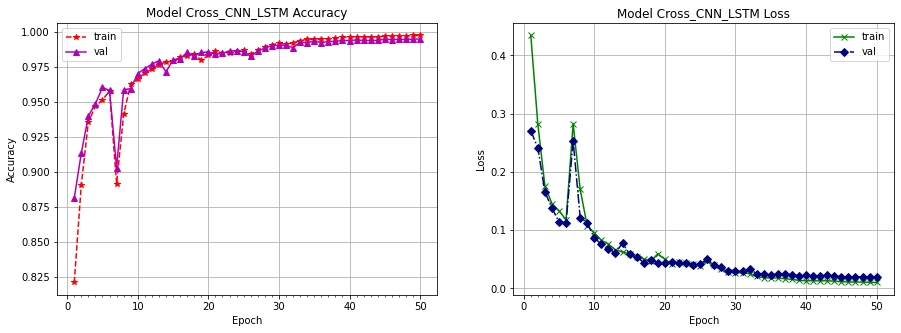

In [21]:
#1. Function to plot model's validation loss and validation accuracy
import pickle
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'], '--*', color = (1,0,0))
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'], '-^', color = (0.7,0,0.7))
    axs[0].set_title('Model '+modelName+' Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid('on')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'],'-x', color = (0,0.5,0))
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'],  '-.D', color = (0,0,0.5))
    axs[1].set_title('Model '+modelName+' Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid('on')
    plt.savefig('./'+modelName+'.jpg',dpi=600, quality = 100, optimize = True)
    plt.show()

plot_model_history(history)
with open('./History_'+modelName, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

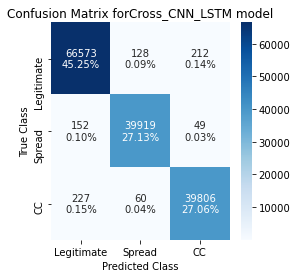

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
import seaborn as sns


y_pred = model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3) # 3classes

label = ['Legitimate','Spread','CC']

plt.figure(figsize=(4,4)) # 

sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [23]:
import random
import pickle
#import cv2
import datetime
from pprint import pprint
from sklearn.metrics import classification_report

print(classification_report(y_test_cm, y_pred_cm, target_names= ['Legitimate','Spread','CC'], digits=4))

loss, accuracy = model.evaluate(x_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['Legitimate','Spread','CC']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

              precision    recall  f1-score   support

  Legitimate     0.9943    0.9949    0.9946     66913
      Spread     0.9953    0.9950    0.9952     40120
          CC     0.9935    0.9928    0.9932     40093

    accuracy                         0.9944    147126
   macro avg     0.9944    0.9943    0.9943    147126
weighted avg     0.9944    0.9944    0.9944    147126

4598/4598 [==============================] - 61s 13ms/step - loss: 0.0207 - accuracy: 0.9944
Test: accuracy = 0.994372  ;  loss = 0.020730
